In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.ensemble import VotingClassifier

#Load CSV file

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Heart Disease/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#Data Preparation

##Encoding

In [ ]:
# Columns to one-hot encode
columns_to_encode = ['cp', 'restecg', 'slope', 'thal']

In [ ]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,...,0,1,0,0,1,0,0,0,0,1


##Scaling

In [ ]:
columns_to_scale = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

In [ ]:
df_scaled

,age,trestbps,chol,thalach,oldpeak,ca
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429
...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,-0.714429
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,-0.714429
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1.244593
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.265082


In [ ]:
df_encoded.drop(columns=columns_to_scale, inplace=True)

In [ ]:
df_encoded

,sex,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
299,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
300,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
301,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
df_concatenated = pd.concat([df_encoded, df_scaled], axis=1)

df_concatenated

,sex,fbs,exang,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak,ca
0,1,1,0,1,0,0,0,1,1,0,...,0,1,0,0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429
2,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429
3,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429
4,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0.290464,0.478391,-0.101730,-1.165281,-0.724323,-0.714429
299,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,-1.033002,-1.234996,0.342756,-0.771706,0.138373,-0.714429
300,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1.503641,0.706843,-1.029353,-0.378132,2.036303,1.244593
301,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.265082


##Balancing

In [ ]:
X = df.drop("target",axis=1)
y = df.loc[:,['target']]

In [ ]:
X.shape, y.shape

((303, 13), (303, 1))

In [ ]:
y['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
X_train.shape, y_train.shape

((212, 13), (212, 1))

In [ ]:
y_train['target'].value_counts()

1    120
0     92
Name: target, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape, y_resampled.shape

((240, 13), (240, 1))

In [ ]:
y_resampled['target'].value_counts()

1    120
0    120
Name: target, dtype: int64

In [ ]:
X_train = X_resampled
y_train = y_resampled

#MODEL BUILDING

In [ ]:
results = pd.DataFrame(columns=['Model','Accuracy','Precision', 'Recall', 'F1-Score', 'AUC'])
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC


#Model 1 - Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

Accuracy:  0.8571428571428571
Precision:  0.8333333333333334
Recall:  0.8888888888888888
F1-Score:  0.8602150537634408


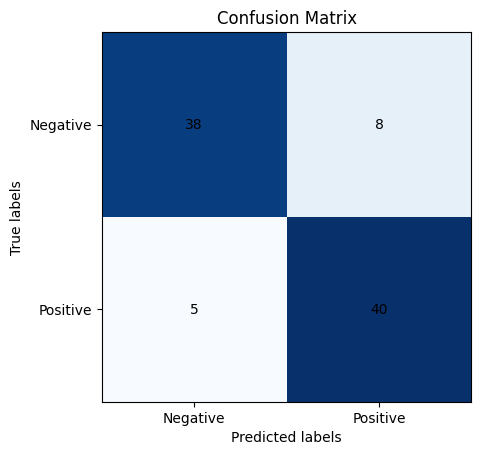

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix
labels = ['Negative', 'Positive'] # define class labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center')
plt.show()

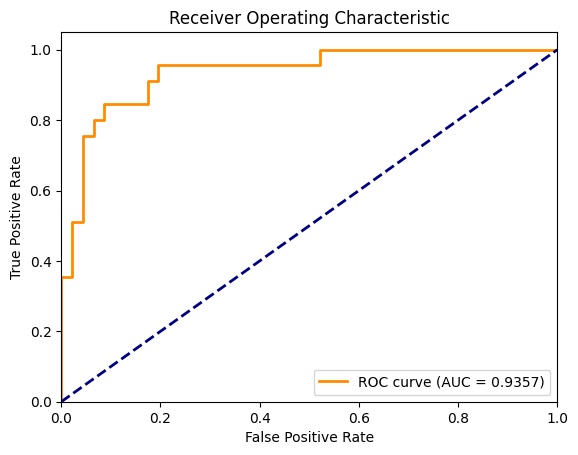

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_row = {'Model': 'Logistic Regression',
           'Accuracy':accuracy,
           'Recall':recall,
           'Precision':precision,
           'F1-Score':F1_score,
           'AUC':roc_auc
           }
results = results.append(new_row, ignore_index=True)

# Model 2 - Support Vector Machines(SVM)

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

Accuracy:  0.8241758241758241
Precision:  0.7959183673469388
Recall:  0.8666666666666667
F1-Score:  0.8297872340425533


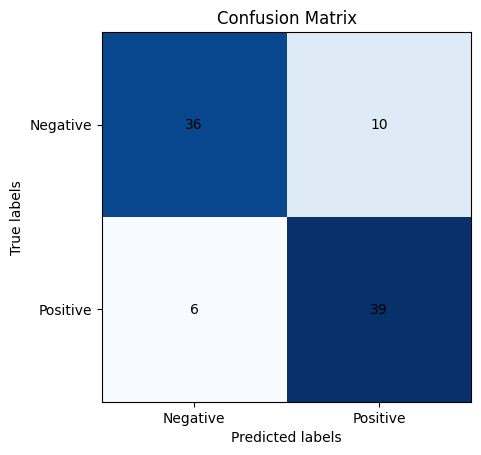

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix
labels = ['Negative', 'Positive'] # define class labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center')
plt.show()

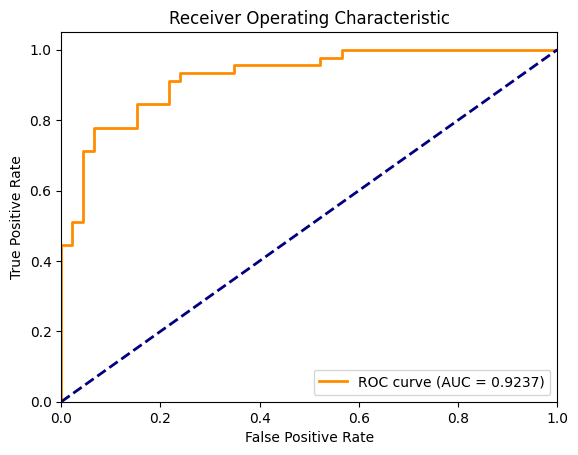

In [ ]:
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_row = {'Model': 'Support Vector Machine',
           'Accuracy':accuracy,
           'Recall':recall,
           'Precision':precision,
           'F1-Score':F1_score,
           'AUC':roc_auc
           }
results = results.append(new_row, ignore_index=True)

#Model 3 - Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

Accuracy:  0.8681318681318682
Precision:  0.8235294117647058
Recall:  0.9333333333333333
F1-Score:  0.8749999999999999


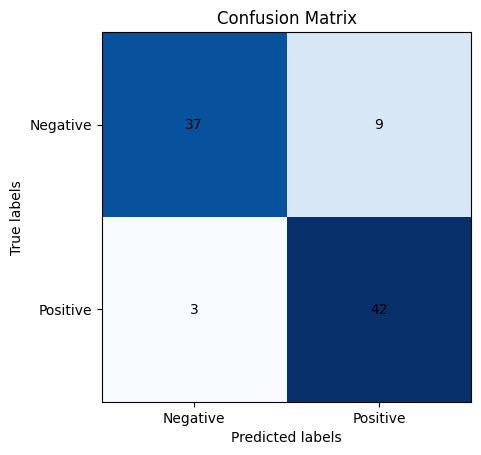

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix
labels = ['Negative', 'Positive'] # define class labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center')
plt.show()

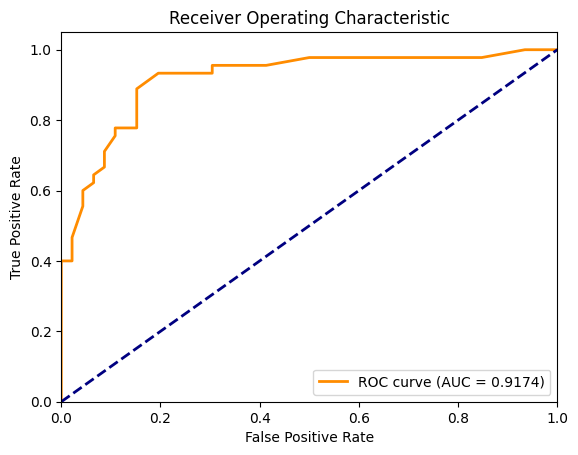

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_row = {'Model': 'Random Forest',
           'Accuracy':accuracy,
           'Recall':recall,
           'Precision':precision,
           'F1-Score':F1_score,
           'AUC':roc_auc
           }
results = results.append(new_row, ignore_index=True)

# Model 4 - K Nearest Neighbours (KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

Accuracy:  0.6373626373626373
Precision:  0.6153846153846154
Recall:  0.7111111111111111
F1-Score:  0.6597938144329897


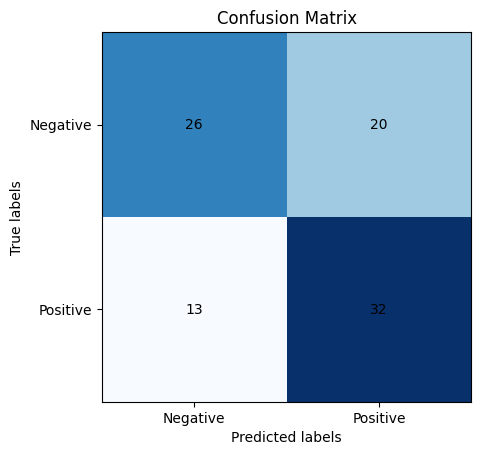

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix
labels = ['Negative', 'Positive'] # define class labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center')
plt.show()

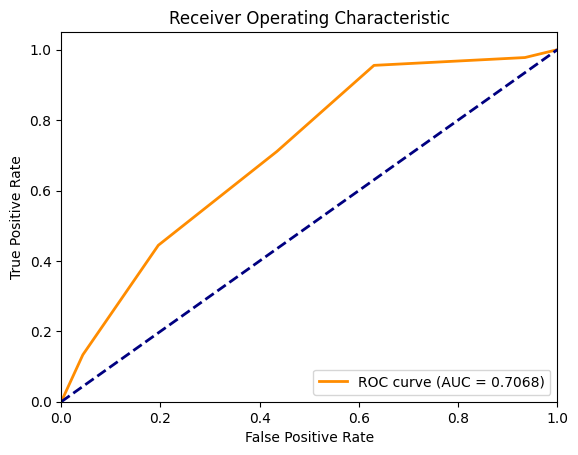

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_row = {'Model': 'K Nearest Neighbours',
           'Accuracy':accuracy,
           'Recall':recall,
           'Precision':precision,
           'F1-Score':F1_score,
           'AUC':roc_auc
           }
results = results.append(new_row, ignore_index=True)

#Ensemble Model

In [ ]:
ensemble_model = VotingClassifier(estimators=[
    ('logistic', logreg),
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='soft')

In [ ]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

F1_score = f1_score(y_test, y_pred)
print("F1-Score: ", F1_score)

Accuracy:  0.8681318681318682
Precision:  0.8235294117647058
Recall:  0.9333333333333333
F1-Score:  0.8749999999999999


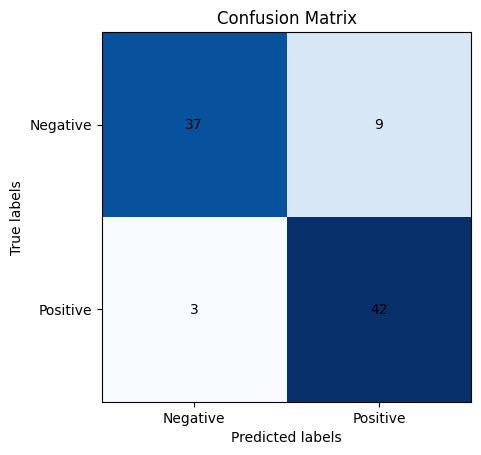

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix
labels = ['Negative', 'Positive'] # define class labels
fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center')
plt.show()

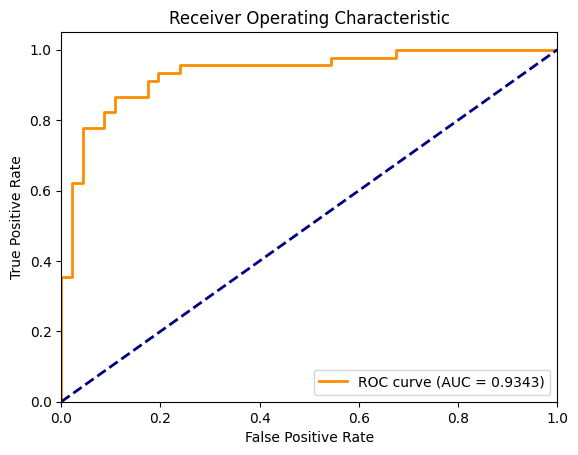

In [ ]:
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_row = {'Model': 'Ensemble',
           'Accuracy':accuracy,
           'Recall':recall,
           'Precision':precision,
           'F1-Score':F1_score,
           'AUC':roc_auc
           }
results = results.append(new_row, ignore_index=True)

In [ ]:
results.set_index('Model', inplace=True)
results

,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.857143,0.833333,0.888889,0.860215,0.935749
Support Vector Machine,0.824176,0.795918,0.866667,0.829787,0.923671
Random Forest,0.868132,0.823529,0.933333,0.875000,0.917391
K Nearest Neighbours,0.637363,0.615385,0.711111,0.659794,0.706763
Ensemble,0.868132,0.823529,0.933333,0.875000,0.934300
